In [1]:
import torch
import torch.nn as nn
import torchinfo as ti
import torchsummary as ts

import math
import matplotlib.pyplot as plt

from transformers import AutoConfig, AutoTokenizer, AutoModelForMaskedLM

In [2]:
MODEL_NAME = 'FacebookAI/xlm-roberta-base'
config = AutoConfig.from_pretrained(MODEL_NAME)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [3]:
config

XLMRobertaConfig {
  "_name_or_path": "FacebookAI/xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.42.4",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}

In [4]:
# Load model directly
model = AutoModelForMaskedLM.from_pretrained(MODEL_NAME)
model

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of the model checkpoint at FacebookAI/xlm-roberta-base were not used when initializing XLMRobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


XLMRobertaForMaskedLM(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
  

In [36]:
ti.summary(model)

Layer (type:depth-idx)                                       Param #
XLMRobertaForMaskedLM                                        --
├─XLMRobertaModel: 1-1                                       --
│    └─XLMRobertaEmbeddings: 2-1                             --
│    │    └─Embedding: 3-1                                   192,001,536
│    │    └─Embedding: 3-2                                   394,752
│    │    └─Embedding: 3-3                                   768
│    │    └─LayerNorm: 3-4                                   1,536
│    │    └─Dropout: 3-5                                     --
│    └─XLMRobertaEncoder: 2-2                                --
│    │    └─ModuleList: 3-6                                  85,054,464
├─XLMRobertaLMHead: 1-2                                      --
│    └─Linear: 2-3                                           590,592
│    └─LayerNorm: 2-4                                        1,536
│    └─Linear: 2-5                                           192,

# Roberta Architecture

In [ ]:
XLMRobertaForTokenClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
          )
          (intermediate): XLMRobertaIntermediate(
            (dense): Linear(in_features=1024, out_features=4096, bias=True)
            (intermediate_act_fn): GELUActivation()
          )
          (output): XLMRobertaOutput(
            (dense): Linear(in_features=4096, out_features=1024, bias=True)
            (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (classifier): Linear(in_features=1024, out_features=2, bias=True)
)

# RobetaLayerNorm

In [7]:
class RobetaLayerNorm(nn.Module):
    def __init__(self, hidden_size, layer_norm_eps=1e-05):
        super(RobetaLayerNorm, self).__init__()
        self.gamma = nn.Parameter(torch.ones(hidden_size)) # weight에 대한 것
        self.beta = nn.Parameter(torch.zeros(hidden_size)) # 바이어스에 대한 것
        self.variance_epsilon = layer_norm_eps
        
    def forward(self, x):
        # 평균
        u = x.mean(-1, keepdim=True)
        # 분산
        s = (x - u).pow(2).mean(-1, keepdim=True)
        # 일반 정규화 적용 variance_epsilon은 0으로 나누지 않도록 보조 항 삽입
        x = (x - u) / torch.sqrt(s + self.variance_epsilon)
        # 최종적으로 gamma 와 x를 곱하고 beta를 더해서 return
        return self.gamma * x + self.beta

# XLMRobertaEmbeddings

In [ ]:
XLMRobertaEmbeddings(
  (word_embeddings): Embedding(250002, 1024, padding_idx=1)
  (position_embeddings): Embedding(514, 1024, padding_idx=1)
  (token_type_embeddings): Embedding(1, 1024)
  (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [4]:
class XLMRobertaEmbeddings(nn.Module):
    def __init__(self, config):
        super(XLMRobertaEmbeddings, self).__init__()
        
        self.word_embeddings = nn.Embedding(config.vocab_size, config.hidden_size, padding_idx=1)
        self.position_embeddings = nn.Embedding(config.max_position_embeddings, config.hidden_size, padding_idx=1)
        self.token_type_embeddings = nn.Embedding(1, config.hidden_size)
        
        self.LayerNorm = nn.LayerNorm(config.hidden_size, eps=config.layer_norm_eps, elementwise_affine=True)
        self.dropout = nn.Dropout(p=0.1, inplace=False)
        
    def forward(self, input_ids, token_type_ids=None):
        
        # word embedding
        word_embeddings = self.word_embeddings(input_ids)
        
        # pos embedding
        seq_len = input_ids.size(1)
        position_ids = torch.arange(
            seq_len, dtype=torch.long, device=input_ids.device)
        position_ids = position_ids.unsqueeze(0).expand_as(input_ids)
        position_embeddings = self.position_embeddings(position_ids)
        
        # token type ids embedding
        # RoBERTa doesn’t have token_type_ids, so you don’t need to indicate which token belongs to which segment.
        # Just separate your segments with the separation token tokenizer.sep_token (or </s>).
        # if token_type_ids is None:
        #     token_type_ids = torch.zeros_like(input_ids)
        
        # print('token_type_ids shape : {}'.format(token_type_ids.shape))
        # token_type_embeddings = self.token_type_embeddings(token_type_ids)
        
        total_embedding = word_embeddings + position_embeddings # + token_type_embeddings
        
        total_embedding = self.LayerNorm(total_embedding)
        total_embedding = self.dropout(total_embedding)
        
        return total_embedding

In [9]:
robeta_embedding = XLMRobertaEmbeddings(config)
robeta_embedding

XLMRobertaEmbeddings(
  (word_embeddings): Embedding(250002, 1024, padding_idx=1)
  (position_embeddings): Embedding(514, 1024, padding_idx=1)
  (token_type_embeddings): Embedding(1, 1024)
  (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [10]:
token = tokenizer(['Hi my name is DR', 'What`s is your name?'], return_tensors='pt', return_token_type_ids=True, padding=True)
token

{'input_ids': tensor([[    0,  2673,   759,  9351,    83, 28235,     2,     1,     1],
        [    0,  4865,  1135,     7,    83,   935,  9351,    32,     2]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [11]:
input_ids = token['input_ids']
token_type_ids = token['token_type_ids']
attention_mask = token['attention_mask']

In [12]:
input_ids.dtype

torch.int64

In [13]:
robeta_embedding(input_ids, token_type_ids).shape

torch.Size([2, 9, 1024])

# XLMRobertaSelfAttention

In [ ]:
XLMRobertaSelfAttention(
  (query): Linear(in_features=1024, out_features=1024, bias=True)
  (key): Linear(in_features=1024, out_features=1024, bias=True)
  (value): Linear(in_features=1024, out_features=1024, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [5]:
def apply_dynamic_masking_to_attention(attention_scores, dynamic_mask):
        """
        Attention Score에 Dynamic Masking을 적용합니다.

        Args:
            attention_scores (torch.Tensor): Attention Score Tensor (batch_size, seq_len, seq_len).
            dynamic_mask (torch.Tensor): Dynamic Mask Tensor (batch_size, seq_len, seq_len), 
                                         마스킹된 위치는 0, 유효한 위치는 1.

        Returns:
            torch.Tensor: Masking이 적용된 Attention Scores.
        """
        # Dynamic Mask의 유효하지 않은 부분에 큰 음수 값 추가
        attention_scores = attention_scores + (1 - dynamic_mask) * -1e9
        return attention_scores
    
# 예제 데이터
batch_size, seq_len, dim = 2, 4, 64
query_layer = torch.randn(batch_size, seq_len, dim)
key_layer = torch.randn(batch_size, seq_len, dim)

# Step 1: Query와 Key로 Attention Scores 계산
attention_scores = torch.matmul(query_layer, key_layer.transpose(-1, -2))  # (batch_size, seq_len, seq_len)

# Step 2: 스케일링
attention_scores = attention_scores / math.sqrt(dim)
print(attention_scores.shape)
# Step 3: Dynamic Mask 생성 (동적으로 지정된 마스크)
# 예: 특정 위치를 확률적으로 마스킹
dynamic_mask = torch.randint(0, 2, (attention_scores.shape)).float()  # 1 (유효), 0 (마스킹)

# Step 4: Dynamic Masking 적용
masked_attention_scores = apply_dynamic_masking_to_attention(attention_scores, dynamic_mask)

# Step 5: Softmax 계산
# attention_probs = torch.nn.functional.softmax(masked_attention_scores, dim=-1)

# 출력 확인
print("Original Attention Scores:", attention_scores)
print("Dynamic Mask:", dynamic_mask)
print("Masked Attention Scores:", masked_attention_scores)
# print("Attention Probabilities:", attention_probs)

torch.Size([2, 4, 4])
Original Attention Scores: tensor([[[-2.0798,  1.1145,  1.5379, -0.1509],
         [-0.4204, -0.7292, -0.6762, -0.1095],
         [ 0.5364,  0.1331, -1.1638, -1.4582],
         [-0.3376,  0.3296,  0.7896, -0.5031]],

        [[-0.8278, -0.9356, -0.2948,  0.0626],
         [-0.3656, -1.0651,  0.4983,  0.5633],
         [-0.7811,  0.1333, -0.6682, -0.8084],
         [-0.8472,  0.1104, -0.3160,  0.4492]]])
Dynamic Mask: tensor([[[0., 1., 1., 1.],
         [1., 0., 0., 0.],
         [0., 1., 1., 0.],
         [0., 0., 1., 0.]],

        [[1., 0., 1., 1.],
         [0., 0., 0., 0.],
         [1., 1., 0., 1.],
         [0., 1., 0., 1.]]])
Masked Attention Scores: tensor([[[-1.0000e+09,  1.1145e+00,  1.5379e+00, -1.5092e-01],
         [-4.2039e-01, -1.0000e+09, -1.0000e+09, -1.0000e+09],
         [-1.0000e+09,  1.3310e-01, -1.1638e+00, -1.0000e+09],
         [-1.0000e+09, -1.0000e+09,  7.8961e-01, -1.0000e+09]],

        [[-8.2776e-01, -1.0000e+09, -2.9484e-01,  6.2566e-

In [23]:
class XLMRobertaSelfAttention(nn.Module):
    def __init__(self, config):
        super(XLMRobertaSelfAttention, self).__init__()
        
        # number of attention head
        self.num_attention_heads = config.num_attention_heads
        
        self.attention_head_size = int(config.hidden_size / config.num_attention_heads)
        self.all_head_size = self.num_attention_heads * self.attention_head_size
        
        # Self-Attention의 특징량을 작성하는 전결합 층
        self.query = nn.Linear(config.hidden_size, self.all_head_size)
        self.key = nn.Linear(config.hidden_size, self.all_head_size)
        self.value = nn.Linear(config.hidden_size, self.all_head_size)
        
        # drop out
        self.drop_out = nn.Dropout(config.attention_probs_dropout_prob)
        
    def transpose_for_scores(self, x):
        '''
            Multi-Headed Attention용으로 텐서의 형태 변환
            [batch_size, seq_len, hidden] -> [batch_size, 12, seq_len, hidden/12]
        '''
        new_x_shape = x.size()[:-1] + (self.num_attention_heads, self.attention_head_size)
        x = x.view(*new_x_shape)
        return x.permute(0, 2, 1, 3)
        
    def apply_dynamic_masking_to_attention(attention_scores, dynamic_mask):
        """
        Attention Score에 Dynamic Masking을 적용합니다.

        Args:
            attention_scores (torch.Tensor): Attention Score Tensor (batch_size, seq_len, seq_len).
            dynamic_mask (torch.Tensor): Dynamic Mask Tensor (batch_size, seq_len, seq_len), 
                                         마스킹된 위치는 0, 유효한 위치는 1.

        Returns:
            torch.Tensor: Masking이 적용된 Attention Scores.
        """
        # Dynamic Mask의 유효하지 않은 부분에 큰 음수 값 추가
        attention_scores = attention_scores + (1 - dynamic_mask) * -1e9
        return attention_scores
        
    def forward(self, hidden_states, attention_mask, attention_show_fig=False):
        
        # query, key, value 계산
        query_layer = self.query(hidden_states)
        key_layer = self.key(hidden_states)
        value_layer = self.value(hidden_states)
        
        # Multi-Headed Attention용으로 텐서 형태 변환
        query_multi_layer = self.transpose_for_scores(query_layer)
        key_multi_layer = self.transpose_for_scores(key_layer)
        value_multi_layer = self.transpose_for_scores(value_layer)
        
        # query & key attention score 계산
        attention_score = torch.matmul(query_multi_layer, key_multi_layer.transpose(-1, -2))
        # softmax 전 scaling 진행
        attention_score = attention_score / math.sqrt(self.attention_head_size)
        # dynamic masking 적용
        # dynamic_mask = torch.randint(0, 2, (attention_score.shape)).float()
        # masked_attention_scores = apply_dynamic_masking_to_attention(attention_scores, dynamic_mask)
       
        # [PAD] token 음수화
        # attention_mask : 문장에 [PAD]가 있을 때 -10000이라는 큰 음의 양수를 더해줌으로써 softmax에서의 값이 작아지게끔 하는 효과를 지님
        attention_scores = attention_score + attention_mask
        # softmax 계산
        attention_probs = nn.Softmax(dim=-1)(attention_scores)
        # print(torch.where( attention_probs > 1, attention_probs, 0))
        # dropout
        attention_probs = self.drop_out(attention_probs)
        
        # value 곱
        context_layer = torch.matmul(attention_probs, value_multi_layer)
        
        # 기존의 차원으로 돌리고 펼쳐주기
        context_layer = context_layer.permute(0, 2, 1, 3).contiguous()
        new_context_layer_shape = context_layer.size()[:-2] + (self.all_head_size,)
        context_layer = context_layer.view(*new_context_layer_shape)
        
        # attention_show일 경우 attention_probs도 반환
        if attention_show_fig == True:
            return context_layer, attention_probs
        elif attention_show_fig == False:
            return context_layer

In [154]:
math.sqrt(768/12)

8.0

In [16]:
roberta_self_attn = XLMRobertaSelfAttention(config)
roberta_self_attn

XLMRobertaSelfAttention(
  (query): Linear(in_features=1024, out_features=1024, bias=True)
  (key): Linear(in_features=1024, out_features=1024, bias=True)
  (value): Linear(in_features=1024, out_features=1024, bias=True)
  (drop_out): Dropout(p=0.1, inplace=False)
)

# XLMRobertaSelfOutput

In [ ]:
(output): XLMRobertaSelfOutput(
  (dense): Linear(in_features=1024, out_features=1024, bias=True)
  (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [24]:
class XLMRobertaSelfOutput(nn.Module):
    def __init__(self, config):
        super(XLMRobertaSelfOutput, self).__init__()
        
        self.dense = nn.Linear(config.hidden_size, config.hidden_size, bias=True)
        self.LayerNorm = nn.LayerNorm(config.hidden_size, eps=config.layer_norm_eps, elementwise_affine=True)
        self.dropout = nn.Dropout(p=0.1, inplace=False)
    
    def forward(self, hidden_states, input_tensor):
        
        hidden_states = self.dense(hidden_states)
        hidden_states = self.LayerNorm(hidden_states)
        hidden_states = self.dropout(hidden_states + input_tensor)
        
        return hidden_states

In [20]:
roberta_self_output = XLMRobertaSelfOutput(config)
roberta_self_output

XLMRobertaSelfOutput(
  (dense): Linear(in_features=1024, out_features=1024, bias=True)
  (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

# XLMRobertaAttention

In [ ]:
(attention): XLMRobertaAttention(
    (self): XLMRobertaSelfAttention(
      (query): Linear(in_features=1024, out_features=1024, bias=True)
      (key): Linear(in_features=1024, out_features=1024, bias=True)
      (value): Linear(in_features=1024, out_features=1024, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (output): XLMRobertaSelfOutput(
      (dense): Linear(in_features=1024, out_features=1024, bias=True)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )

In [25]:
class XLMRobertaAttention(nn.Module):
    def __init__(self, config):
        super(XLMRobertaAttention, self).__init__()
        
        self.self = XLMRobertaSelfAttention(config)
        self.output = XLMRobertaSelfOutput(config)
        
    def forward(self, input_tensor, attention_mask, attention_show_fig):
        if attention_show_fig:
            self_output, attention_probs = self.self(input_tensor, attention_mask, attention_show_fig)
            attention_output = self.output(self_output, input_tensor)
            return attention_output, attention_probs
        
        else:
            self_output = self.self(input_tensor, attention_mask, attention_show_fig)
            attention_output = self.output(self_output, input_tensor)
            return attention_output

In [22]:
roberta_attn = XLMRobertaAttention(config)
roberta_attn

XLMRobertaAttention(
  (self): XLMRobertaSelfAttention(
    (query): Linear(in_features=1024, out_features=1024, bias=True)
    (key): Linear(in_features=1024, out_features=1024, bias=True)
    (value): Linear(in_features=1024, out_features=1024, bias=True)
    (drop_out): Dropout(p=0.1, inplace=False)
  )
  (output): XLMRobertaSelfOutput(
    (dense): Linear(in_features=1024, out_features=1024, bias=True)
    (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
)

In [23]:
print('before roberta embedding input_ids shape : {}'.format(input_ids.shape))
hidden_states = robeta_embedding(input_ids, token_type_ids)
print('after roberta embedding shape : {}'.format(hidden_states.shape))
print('attention mask shape : {}'.format(token['attention_mask'].shape))

attention_mask = token['attention_mask']

extended_attention_mask = attention_mask.unsqueeze(1).unsqueeze(2)
        
# 마스크는 0, 1 이지만 소프트맥스를 계산할 때 마스크가 되도록 0과 -inf로 한다.
# -inf 대신 -10000으로 한다
extended_attention_mask = extended_attention_mask.to(dtype=torch.float32)
extended_attention_mask = (1.0 - extended_attention_mask) * -10000.0
print('extended_attention_mask shape : {}'.format(extended_attention_mask.shape))

result = roberta_attn(hidden_states, extended_attention_mask)
print('after roberta attn result shape : {}'.format(result.shape))

before roberta embedding input_ids shape : torch.Size([2, 9])
after roberta embedding shape : torch.Size([2, 9, 1024])
attention mask shape : torch.Size([2, 9])
extended_attention_mask shape : torch.Size([2, 1, 1, 9])
after roberta attn result shape : torch.Size([2, 9, 1024])


# XLMRobertaIntermediate

In [ ]:
(intermediate): XLMRobertaIntermediate(
    (dense): Linear(in_features=1024, out_features=4096, bias=True)
    (intermediate_act_fn): GELUActivation()
  )

In [26]:
class GELUActivation(nn.Module):
    def __init__(self):
        super(GELUActivation, self).__init__()
    
    def forward(self, x):
        return x * 0.5 * (1.0 + torch.erf(x / math.sqrt(2.0)))

In [27]:
class XLMRobertaIntermediate(nn.Module):
    def __init__(self, config):
        super(XLMRobertaIntermediate, self).__init__()
        self.dense = nn.Linear(config.hidden_size, config.intermediate_size, bias=True)
        self.intermediate_act_fn = GELUActivation()
        
    def forward(self, hidden_states):
        hidden_states = self.dense(hidden_states)
        hidden_states = self.intermediate_act_fn(hidden_states) # GELU에 의한 활성화
        return hidden_states

In [26]:
roberta_inter = XLMRobertaIntermediate(config)
roberta_inter

XLMRobertaIntermediate(
  (dense): Linear(in_features=1024, out_features=4096, bias=True)
  (intermediate_act_fn): GELUActivation()
)

In [27]:
roberta_inter(hidden_states).shape

torch.Size([2, 9, 4096])

# XLMRobertaOutput

In [ ]:
(output): XLMRobertaOutput(
    (dense): Linear(in_features=4096, out_features=1024, bias=True)
    (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )

In [28]:
class XLMRobertaOutput(nn.Module):
    def __init__(self, config):
        super(XLMRobertaOutput, self).__init__()
        
        self.dense = nn.Linear(config.intermediate_size, config.hidden_size, bias=True)
        self.LayerNorm = nn.LayerNorm(config.hidden_size, eps=config.layer_norm_eps, elementwise_affine=True)
        self.dropout = nn.Dropout(p=config.attention_probs_dropout_prob, inplace=False)
        
    def forward(self, hidden_states, input_tensor):
        
        hidden_states = self.dense(hidden_states)
        hidden_states = self.dropout(hidden_states)
        hidden_states = self.LayerNorm(hidden_states + input_tensor)
        
        return hidden_states

In [29]:
roberta_output = XLMRobertaSelfOutput(config)
roberta_output

XLMRobertaSelfOutput(
  (dense): Linear(in_features=1024, out_features=1024, bias=True)
  (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

# XLMRobertaLayer

In [ ]:
XLMRobertaLayer(
  (attention): XLMRobertaAttention(
    (self): XLMRobertaSelfAttention(
      (query): Linear(in_features=1024, out_features=1024, bias=True)
      (key): Linear(in_features=1024, out_features=1024, bias=True)
      (value): Linear(in_features=1024, out_features=1024, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (output): XLMRobertaSelfOutput(
      (dense): Linear(in_features=1024, out_features=1024, bias=True)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (intermediate): XLMRobertaIntermediate(
    (dense): Linear(in_features=1024, out_features=4096, bias=True)
    (intermediate_act_fn): GELUActivation()
  )
  (output): XLMRobertaOutput(
    (dense): Linear(in_features=4096, out_features=1024, bias=True)
    (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
)

In [29]:
class XLMRobertaLayer(nn.Module):
    def __init__(self, config):
        super(XLMRobertaLayer, self).__init__()
        
        self.attention = XLMRobertaAttention(config)
        self.intermediate = XLMRobertaIntermediate(config)
        self.output = XLMRobertaOutput(config)
        
    def forward(self, hidden_states, attention_mask, attention_show_fig=False):
        
        if attention_show_fig == True:
            '''attention_show일 경우 attention_probs도 반환'''
            attention_output, attention_probs = self.attention(hidden_states, 
                                                               attention_mask, 
                                                               attention_show_fig)
            
            intermediate_output = self.intermediate(attention_output)
            
            layer_output = self.output(intermediate_output, attention_output)
            
            return layer_output, attention_probs
        
        elif attention_show_fig == False:
            attention_output = self.attention(hidden_states, 
                                              attention_mask, 
                                              attention_show_fig)
            
            intermediate_output = self.intermediate(attention_output)
            
            layer_output = self.output(intermediate_output, attention_output)
            
            return layer_output # [batch_size, seq_length, hidden_size]

In [31]:
roberta_layer = XLMRobertaLayer(config)
roberta_layer

XLMRobertaLayer(
  (attention): XLMRobertaAttention(
    (self): XLMRobertaSelfAttention(
      (query): Linear(in_features=1024, out_features=1024, bias=True)
      (key): Linear(in_features=1024, out_features=1024, bias=True)
      (value): Linear(in_features=1024, out_features=1024, bias=True)
      (drop_out): Dropout(p=0.1, inplace=False)
    )
    (output): XLMRobertaSelfOutput(
      (dense): Linear(in_features=1024, out_features=1024, bias=True)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (intermediate): XLMRobertaIntermediate(
    (dense): Linear(in_features=1024, out_features=4096, bias=True)
    (intermediate_act_fn): GELUActivation()
  )
  (output): XLMRobertaOutput(
    (dense): Linear(in_features=4096, out_features=1024, bias=True)
    (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
)

# XLMRobertaEncoder

In [ ]:
XLMRobertaEncoder(
  (layer): ModuleList(
    (0-23): 24 x XLMRobertaLayer(
      (attention): XLMRobertaAttention(
        (self): XLMRobertaSelfAttention(
          (query): Linear(in_features=1024, out_features=1024, bias=True)
          (key): Linear(in_features=1024, out_features=1024, bias=True)
          (value): Linear(in_features=1024, out_features=1024, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (output): XLMRobertaSelfOutput(
          (dense): Linear(in_features=1024, out_features=1024, bias=True)
          (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (intermediate): XLMRobertaIntermediate(
        (dense): Linear(in_features=1024, out_features=4096, bias=True)
        (intermediate_act_fn): GELUActivation()
      )
      (output): XLMRobertaOutput(
        (dense): Linear(in_features=4096, out_features=1024, bias=True)
        (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
)

In [30]:
class XLMRobertaEncoder(nn.Module):
    def __init__(self, config):
        super(XLMRobertaEncoder, self).__init__()
            
        self.layer = nn.ModuleList([XLMRobertaLayer(config) for _ in range(config.num_hidden_layers)])
        
    def forward(self, 
                hidden_states, 
                attention_mask, 
                output_all_encoded_layers=True, 
                attention_show_fig=False):
        
        # 반환 값으로 사용할 리스트
        all_encoder_layers = []
        
        # BertLayer 모듈의 처리 반복
        for layer_module in self.layer:
            
            if attention_show_fig == True:
                '''attention_show의 경우 attention_probs도 반환'''
                hidden_states, attention_probs = layer_module(hidden_states, attention_mask, attention_show_fig)
            elif attention_show_fig == False:
                hidden_states = layer_module(hidden_states, attention_mask, attention_show_fig)
                
            # 반환 값으로 BertLayer에서 출력된 특징량만을 사용할 경우의 처리
            if output_all_encoded_layers:
                all_encoder_layers.append(hidden_states)
                    
        # 반환 값으로 마지막 BertLayer에서 출력된 특징량만을 사용할 경우의 처리
        if not output_all_encoded_layers:
            all_encoder_layers.append(hidden_states)
            
        # attention_show의 경우 attention_probs(마지막 12단)도 반환한다.
        if attention_show_fig == True:
            return all_encoder_layers, attention_probs
        elif attention_show_fig == False:
            return all_encoder_layers

In [33]:
roberta_encoder = XLMRobertaEncoder(config)
roberta_encoder

XLMRobertaEncoder(
  (layer): ModuleList(
    (0-23): 24 x XLMRobertaLayer(
      (attention): XLMRobertaAttention(
        (self): XLMRobertaSelfAttention(
          (query): Linear(in_features=1024, out_features=1024, bias=True)
          (key): Linear(in_features=1024, out_features=1024, bias=True)
          (value): Linear(in_features=1024, out_features=1024, bias=True)
          (drop_out): Dropout(p=0.1, inplace=False)
        )
        (output): XLMRobertaSelfOutput(
          (dense): Linear(in_features=1024, out_features=1024, bias=True)
          (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (intermediate): XLMRobertaIntermediate(
        (dense): Linear(in_features=1024, out_features=4096, bias=True)
        (intermediate_act_fn): GELUActivation()
      )
      (output): XLMRobertaOutput(
        (dense): Linear(in_features=4096, out_features=1024, bias=True)
        (LayerNorm):

# XLMRobertaModel

In [ ]:
XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
          )
          (intermediate): XLMRobertaIntermediate(
            (dense): Linear(in_features=1024, out_features=4096, bias=True)
            (intermediate_act_fn): GELUActivation()
          )
          (output): XLMRobertaOutput(
            (dense): Linear(in_features=4096, out_features=1024, bias=True)
            (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
    )
  )

In [31]:
class XLMRobertaModel(nn.Module):
    def __init__(self, config):
        super(XLMRobertaModel, self).__init__()
        
        self.embeddings = XLMRobertaEmbeddings(config)
        self.encoder = XLMRobertaEncoder(config)
        
    def forward(self, input_tensor, 
                attention_mask, 
                token_type_ids=None, 
                output_all_encoded_layers=True, 
                attention_show_fig=False):
    
        # Attention 마스크와 첫 번째, 두 번째 문장의 id가 없으면 작성
        if attention_mask is None:
            attention_mask = torch.one_like(input_ids)
        if token_type_ids is None:
            token_type_ids = torch.zeros_like(input_ids)
        
        # 마스크 변형 [minibatch, 1, 1, seq_length]로 한다.
        # 나중에 Multi-Headed Self-Attention에서 사용할 수 있는 형태로 하기 위하여
        extended_attention_mask = attention_mask.unsqueeze(1).unsqueeze(2)
        
        # 마스크는 0, 1 이지만 소프트맥스를 계산할 때 마스크가 되도록 0과 -inf로 한다.
        # -inf 대신 -10000으로 한다
        extended_attention_mask = extended_attention_mask.to(dtype=torch.float32)
        extended_attention_mask = (1.0 - extended_attention_mask) * -10000.0
        
        # 순전파
        # BertEmbeddings 모듈
        embedding_output = self.embeddings(input_ids, token_type_ids)
        
        # BertLayer 모듈(Transformer)을 반복하는 BertEncoder 모듈
        if attention_show_fig == True:
            '''attention_show의 경우 attention_probs도 반환'''
            encoded_layers, attention_probs = self.encoder(embedding_output,
                                                           extended_attention_mask,
                                                           output_all_encoded_layers,
                                                           attention_show_fig)
            
        elif attention_show_fig == False:
            encoded_layers = self.encoder(embedding_output,
                                          extended_attention_mask,
                                          output_all_encoded_layers,
                                          attention_show_fig)
        
        
        # output_all_encoded_layer가 False인 경우는 리스트가 아닌 텐서를 반환
        if not output_all_encoded_layers:
            encoded_layers = encoded_layers[-1]
            
        # attention_show의 경우 attention_probs(가장 마지막)도 반환한다.
        if attention_show_fig == True:
            return encoded_layers, attention_probs
        elif attention_show_fig == False:
            return encoded_layers

In [71]:
roberta_model = XLMRobertaModel(config)
roberta_model

XLMRobertaModel(
  (embeddings): XLMRobertaEmbeddings(
    (word_embeddings): Embedding(250002, 1024, padding_idx=1)
    (position_embeddings): Embedding(514, 1024, padding_idx=1)
    (token_type_embeddings): Embedding(1, 1024)
    (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): XLMRobertaEncoder(
    (layer): ModuleList(
      (0-23): 24 x XLMRobertaLayer(
        (attention): XLMRobertaAttention(
          (self): XLMRobertaSelfAttention(
            (query): Linear(in_features=1024, out_features=1024, bias=True)
            (key): Linear(in_features=1024, out_features=1024, bias=True)
            (value): Linear(in_features=1024, out_features=1024, bias=True)
            (drop_out): Dropout(p=0.1, inplace=False)
          )
          (output): XLMRobertaSelfOutput(
            (dense): Linear(in_features=1024, out_features=1024, bias=True)
            (LayerNorm): LayerNorm((1024,), eps=1e-05, elementw

In [72]:
ti.summary(roberta_model)

Layer (type:depth-idx)                                       Param #
XLMRobertaModel                                              --
├─XLMRobertaEmbeddings: 1-1                                  --
│    └─Embedding: 2-1                                        256,002,048
│    └─Embedding: 2-2                                        526,336
│    └─Embedding: 2-3                                        1,024
│    └─LayerNorm: 2-4                                        2,048
│    └─Dropout: 2-5                                          --
├─XLMRobertaEncoder: 1-2                                     --
│    └─ModuleList: 2-6                                       --
│    │    └─XLMRobertaLayer: 3-1                             12,596,224
│    │    └─XLMRobertaLayer: 3-2                             12,596,224
│    │    └─XLMRobertaLayer: 3-3                             12,596,224
│    │    └─XLMRobertaLayer: 3-4                             12,596,224
│    │    └─XLMRobertaLayer: 3-5               

# XLMRobertaLMHead

In [ ]:
(lm_head): XLMRobertaLMHead(
    (dense): Linear(in_features=768, out_features=768, bias=True)
    (layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (decoder): Linear(in_features=768, out_features=250002, bias=True)
  )

In [32]:
class XLMRobertaLMHead(nn.Module):
    def __init__(self, config):
        super(XLMRobertaLMHead, self).__init__()
        
        self.dense = nn.Linear(config.hidden_size, config.hidden_size, bias=True)
        self.layer_norm = nn.LayerNorm(config.hidden_size, eps=config.layer_norm_eps, elementwise_affine=True)
        self.decoder = nn.Linear(config.hidden_size, config.vocab_size, bias=True)
    
    def forward(self, hidden_states):
        
        hidden_states = self.dense(hidden_states)
        hidden_states = self.layer_norm(hidden_states)
        hidden_states = self.decoder(hidden_states)
        
        return hidden_states

# XLMRobertaForTokenClassification

In [ ]:
XLMRobertaForTokenClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
          )
          (intermediate): XLMRobertaIntermediate(
            (dense): Linear(in_features=1024, out_features=4096, bias=True)
            (intermediate_act_fn): GELUActivation()
          )
          (output): XLMRobertaOutput(
            (dense): Linear(in_features=4096, out_features=1024, bias=True)
            (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (classifier): Linear(in_features=1024, out_features=2, bias=True)
)

In [46]:
class XLMRobertaForTokenClassification(nn.Module):
    def __init__(self, config, class_num):
        super(XLMRobertaForTokenClassification, self).__init__()
        
        self.roberta = XLMRobertaModel(config)
        self.dropout = nn.Dropout(p=config.attention_probs_dropout_prob, inplace=False)
        self.classifier = nn.Linear(config.hidden_size, class_num, bias=True)
        
    def forward(self, 
                input_tensor, 
                attention_mask, 
                token_type_ids=None, 
                output_all_encoded_layers=True, 
                attention_show_fig=False):
        
        encoded_layers = self.roberta(input_tensor, 
                         attention_mask, 
                         token_type_ids, 
                         output_all_encoded_layers, 
                         attention_show_fig)
        
        if not output_all_encoded_layers:
            encoded_layers = encoded_layers[-1]
            
        encoded_layers = self.dropout(encoded_layers)
        output = self.classifier(encoded_layers)
        
        return output

In [44]:
final_model = XLMRobertaForTokenClassification(config, 2)
final_model

XLMRobertaForTokenClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (drop_out): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=1024, out_feat

In [40]:
ti.summary(final_model)

Layer (type:depth-idx)                                            Param #
XLMRobertaForTokenClassification                                  --
├─XLMRobertaModel: 1-1                                            --
│    └─XLMRobertaEmbeddings: 2-1                                  --
│    │    └─Embedding: 3-1                                        256,002,048
│    │    └─Embedding: 3-2                                        526,336
│    │    └─Embedding: 3-3                                        1,024
│    │    └─LayerNorm: 3-4                                        2,048
│    │    └─Dropout: 3-5                                          --
│    └─XLMRobertaEncoder: 2-2                                     --
│    │    └─ModuleList: 3-6                                       302,309,376
├─Dropout: 1-2                                                    --
├─Linear: 1-3                                                     2,050
Total params: 558,842,882
Trainable params: 558,842,882
Non-traina

# XLMRobertaForMaskedLM

In [ ]:
XLMRobertaForMaskedLM(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
          )
          (intermediate): XLMRobertaIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermediate_act_fn): GELUActivation()
          )
          (output): XLMRobertaOutput(
            (dense): Linear(in_features=3072, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
    )
  )
  (lm_head): XLMRobertaLMHead(
    (dense): Linear(in_features=768, out_features=768, bias=True)
    (layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (decoder): Linear(in_features=768, out_features=250002, bias=True)
  )
)

In [33]:
class XLMRobertaForMaskedLM(nn.Module):
    def __init__(self, config):
        super(XLMRobertaForMaskedLM, self).__init__()
        
        self.roberta = XLMRobertaModel(config)
        self.lm_head = XLMRobertaLMHead(config)
        
    def forward(self, 
                input_tensor, 
                attention_mask, 
                token_type_ids=None, 
                output_all_encoded_layers=True, 
                attention_show_fig=False):
        
        if attention_show_fig:
            encoded_layers, attention_probs = self.roberta(input_tensor, 
                             attention_mask, 
                             token_type_ids, 
                             output_all_encoded_layers, 
                             attention_show_fig)
            output = self.lm_head(encoded_layers)
            # attention_probs = nn.Softmax(dim=-1)(attention_probs)
            return output, attention_probs
        else:
            encoded_layers = self.roberta(input_tensor, 
                             attention_mask, 
                             token_type_ids, 
                             output_all_encoded_layers, 
                             attention_show_fig)
            output = self.lm_head(encoded_layers)
            return output

In [34]:
final_model = XLMRobertaForMaskedLM(config)
final_model

XLMRobertaForMaskedLM(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (drop_out): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
 

In [150]:
ti.summary(final_model.roberta)

Layer (type:depth-idx)                                  Param #
XLMRobertaModel                                         --
├─XLMRobertaEmbeddings: 1-1                             --
│    └─Embedding: 2-1                                   192,001,536
│    └─Embedding: 2-2                                   394,752
│    └─Embedding: 2-3                                   768
│    └─LayerNorm: 2-4                                   1,536
│    └─Dropout: 2-5                                     --
├─XLMRobertaEncoder: 1-2                                --
│    └─ModuleList: 2-6                                  --
│    │    └─XLMRobertaLayer: 3-1                        7,087,872
│    │    └─XLMRobertaLayer: 3-2                        7,087,872
│    │    └─XLMRobertaLayer: 3-3                        7,087,872
│    │    └─XLMRobertaLayer: 3-4                        7,087,872
│    │    └─XLMRobertaLayer: 3-5                        7,087,872
│    │    └─XLMRobertaLayer: 3-6                        7

In [121]:
ti.summary(final_model)

Layer (type:depth-idx)                                       Param #
XLMRobertaForMaskedLM                                        --
├─XLMRobertaModel: 1-1                                       --
│    └─XLMRobertaEmbeddings: 2-1                             --
│    │    └─Embedding: 3-1                                   192,001,536
│    │    └─Embedding: 3-2                                   394,752
│    │    └─Embedding: 3-3                                   768
│    │    └─LayerNorm: 3-4                                   1,536
│    │    └─Dropout: 3-5                                     --
│    └─XLMRobertaEncoder: 2-2                                --
│    │    └─ModuleList: 3-6                                  85,054,464
├─XLMRobertaLMHead: 1-2                                      --
│    └─Linear: 2-3                                           590,592
│    └─LayerNorm: 2-4                                        1,536
│    └─Linear: 2-5                                           192,

In [ ]:
=====================================================================================
Layer (type:depth-idx)                                       Param #
=====================================================================================
XLMRobertaForMaskedLM                                        --
├─XLMRobertaModel: 1-1                                       --
│    └─XLMRobertaEmbeddings: 2-1                             --
│    │    └─Embedding: 3-1                                   192,001,536
│    │    └─Embedding: 3-2                                   394,752
│    │    └─Embedding: 3-3                                   768
│    │    └─LayerNorm: 3-4                                   1,536
│    │    └─Dropout: 3-5                                     --
│    └─XLMRobertaEncoder: 2-2                                --
│    │    └─ModuleList: 3-6                                  85,054,464
├─XLMRobertaLMHead: 1-2                                      --
│    └─Linear: 2-3                                           590,592
│    └─LayerNorm: 2-4                                        1,536
│    └─Linear: 2-5                                           192,251,538
=====================================================================================
Total params: 470,296,722
Trainable params: 470,296,722
Non-trainable params: 0
=====================================================================================

# 작동확인

In [35]:
token = tokenizer(['Hi my name is DR', 'What`s is your name?'], return_tensors='pt', return_token_type_ids=True, padding=True)

# 동작 확인
# 입력 준비
input_ids = token['input_ids']
attention_mask = token['attention_mask']
token_type_ids = token['token_type_ids']
print('input_ids shape : {}'.format(input_ids.shape))
print('attention_mask shape : {}'.format(attention_mask.shape))
print('token_type_ids shape : {}'.format(token_type_ids.shape))

# 순전파
encoded_layers, attention_probs = final_model(input_ids, 
                             token_type_ids, 
                             attention_mask, 
                             output_all_encoded_layers=False, 
                             attention_show_fig=True)

print('encoded_layers의 텐서 크기:', encoded_layers.shape)
print('attention_probs의 텐서 크기:', attention_probs.shape)

input_ids shape : torch.Size([2, 9])
attention_mask shape : torch.Size([2, 9])
token_type_ids shape : torch.Size([2, 9])
encoded_layers의 텐서 크기: torch.Size([2, 9, 250002])
attention_probs의 텐서 크기: torch.Size([2, 12, 9, 9])


In [36]:
tokenizer.encode('Hi my name is DR')

[0, 2673, 759, 9351, 83, 28235, 2]

In [37]:
# for attn in attention_probs:
#     print(torch.where(attn > 1, attn, 0))

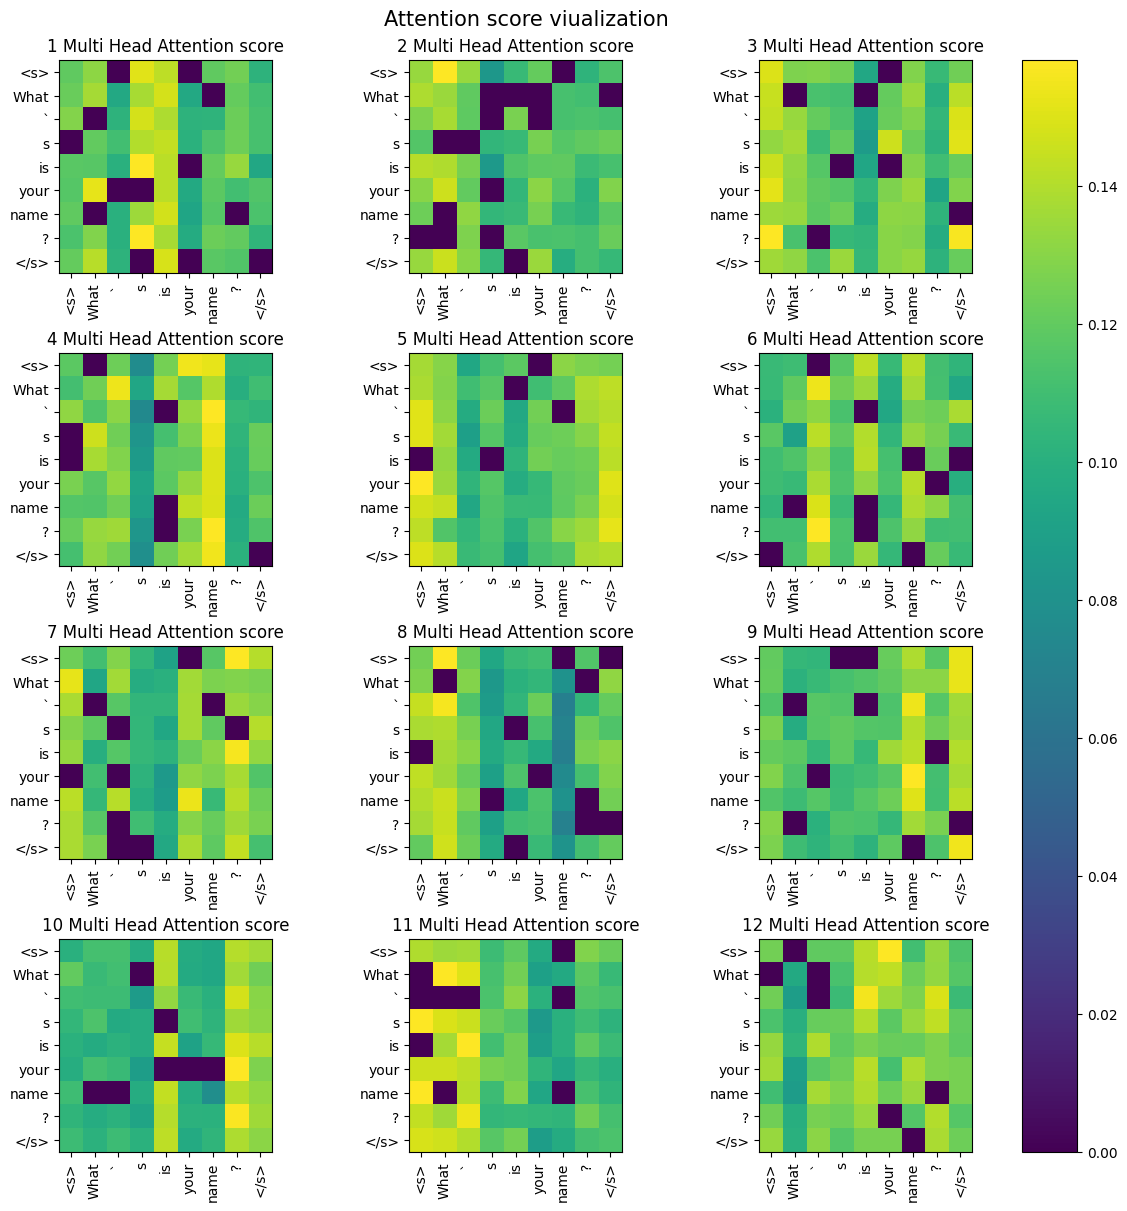

In [38]:
seq = 1
input_ids_lst = token['input_ids'][seq].tolist()
attn_size = attention_probs[seq][0].size()[0]
decoded_token = [tokenizer.decode(ids) for ids in input_ids_lst]

fig, axs = plt.subplots(4, 3, figsize=(12, 12), layout='constrained')

cmap = 'viridis'

t = 0
for x in range(4):
    for y in range(3):
        ax = axs[x][y]
        pcm = ax.matshow(attention_probs[seq][t].detach(), cmap=cmap)
        ax.xaxis.tick_bottom()
        ax.set_xticks(range(attn_size), decoded_token, rotation=90)
        ax.set_yticks(range(attn_size), decoded_token)
        
        t += 1
        ax.set_title('{} Multi Head Attention score'.format(t))

fig.colorbar(pcm, ax=axs, orientation='vertical', fraction=1, pad=0.05)
fig.suptitle('Attention score viualization', fontsize=15)
plt.show()